In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-11-13,37070.304688,37405.117188,36399.605469,36502.355469,36502.355469,19057712790
2023-11-14,36491.789062,36753.351562,34948.500000,35537.640625,35537.640625,23857403554
2023-11-15,35548.113281,37964.894531,35383.781250,37880.582031,37880.582031,27365821679


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [8]:
#EDA
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3.349000e+03
mean,14226.388400,14562.264217,13862.959468,14235.768981,14235.768981,1.648170e+10
std,16004.522976,16394.471083,15564.397466,16004.265531,16004.265531,1.918427e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,895.549011,908.585022,862.424011,896.182983,896.182983,1.460070e+08
50%,8149.876953,8285.617188,7924.670410,8163.419922,8163.419922,1.091867e+10
75%,23030.716797,23422.828125,22654.593750,23032.777344,23032.777344,2.696772e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3349 entries, 2014-09-17 to 2023-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3349 non-null   float64
 1   High       3349 non-null   float64
 2   Low        3349 non-null   float64
 3   Close      3349 non-null   float64
 4   Adj Close  3349 non-null   float64
 5   Volume     3349 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 183.1 KB


In [11]:
#dealing with correlation
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999490,0.999106,0.998809,0.998809,0.686192
High,0.999490,1.000000,0.998956,0.999462,0.999462,0.691328
Low,0.999106,0.998956,1.000000,0.999363,0.999363,0.676737
Close,0.998809,0.999462,0.999363,1.000000,1.000000,0.684937
Adj Close,0.998809,0.999462,0.999363,1.000000,1.000000,0.684937
Volume,0.686192,0.691328,0.676737,0.684937,0.684937,1.000000


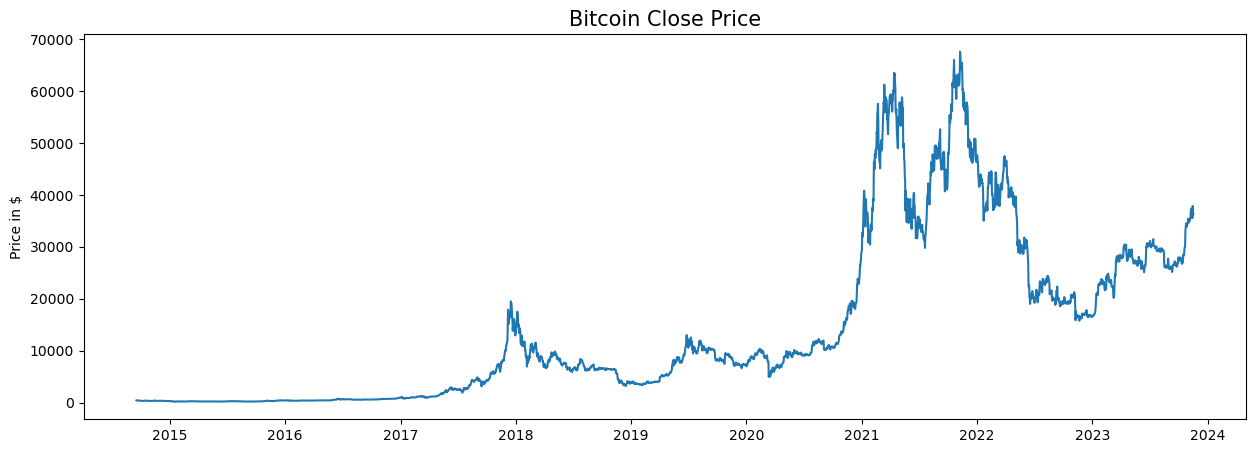

In [43]:
#EDA

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price', fontsize=15)
plt.ylabel("Price in $")
plt.show()

In [44]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((3349, 7), (3349, 7))

In [45]:
df = df.drop(['Adj Close'], axis=1)

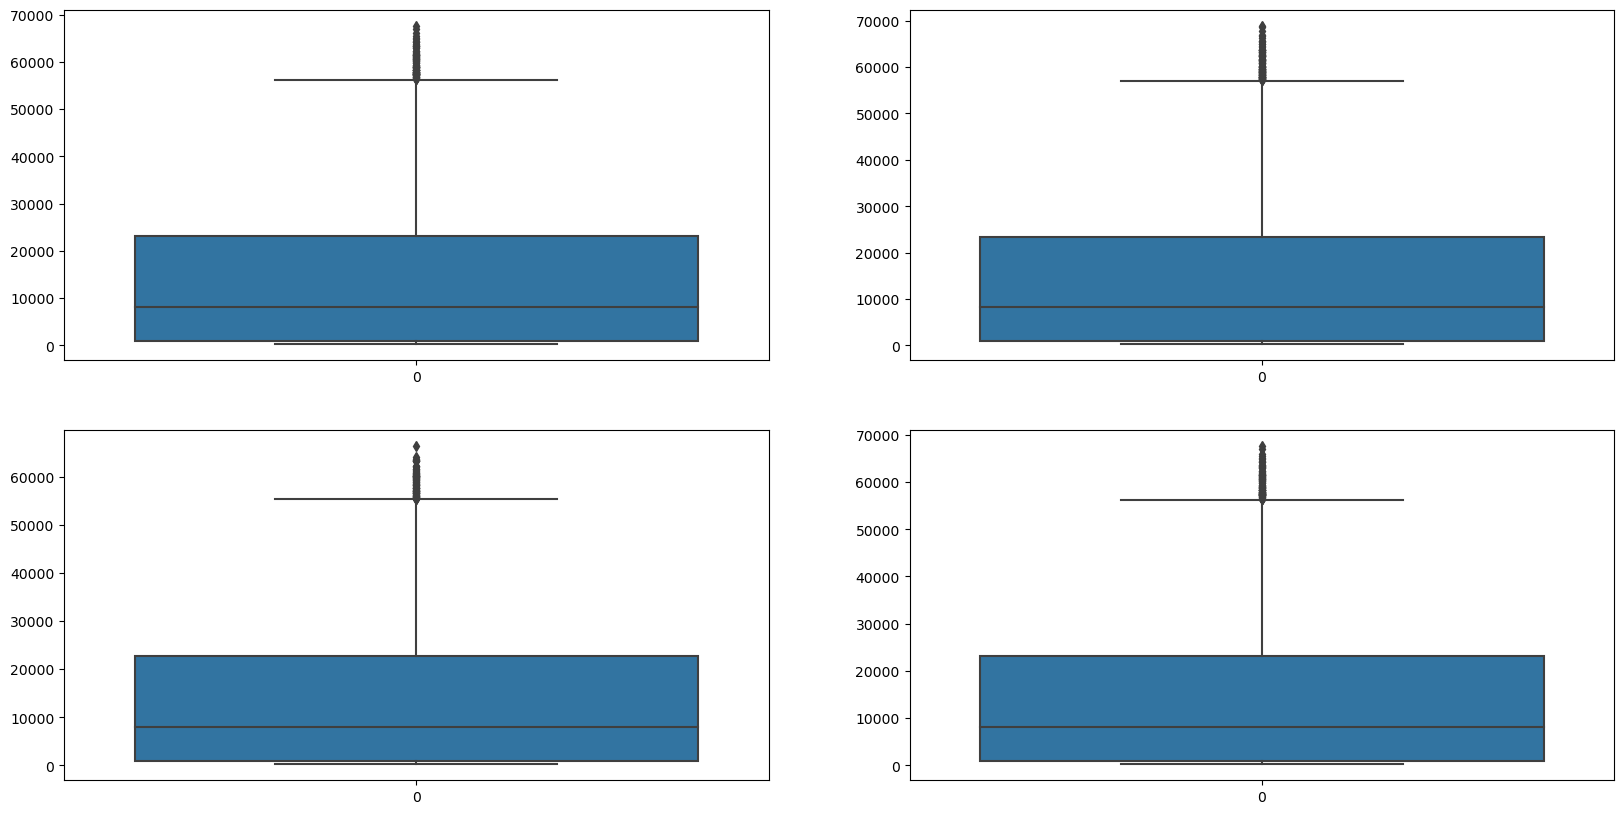

In [47]:
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
plt.show()

In [48]:
#since there are so many outliers, we can assume prices have varied hugely in a very short period of time

In [54]:
'''
this code creates a new column target in the df. the values in the target column are determined by comparing the current
row's close value to the next row's close value. if the next row's close value is greater that current, then target value 
is set to 1, otherwise 0
'''
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df

,Open,High,Low,Close,Volume,Prediction,open-close,low-high,target
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,383.757996,8.529999,-15.752014,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,391.441986,32.419983,-43.755981,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,389.545990,29.307007,-43.302979,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,382.845001,-14.230988,-33.412994,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,386.475006,9.263977,-19.244995,1
...,...,...,...,...,...,...,...,...,...
2023-11-13,37070.304688,37405.117188,36399.605469,36502.355469,19057712790,NaN,567.949219,-1005.511719,0
2023-11-14,36491.789062,36753.351562,34948.500000,35537.640625,23857403554,NaN,954.148438,-1804.851562,1
2023-11-15,35548.113281,37964.894531,35383.781250,37880.582031,27365821679,NaN,-2332.468750,-2581.113281,0


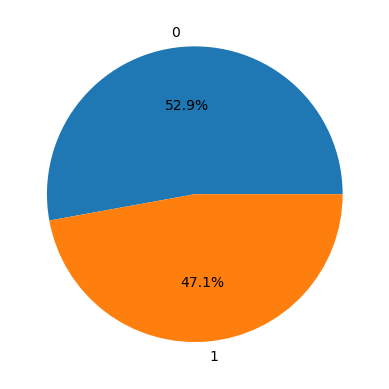

In [55]:
plt.pie(df['target'].value_counts().values, labels = [0,1], autopct='%1.1f%%')
plt.show()

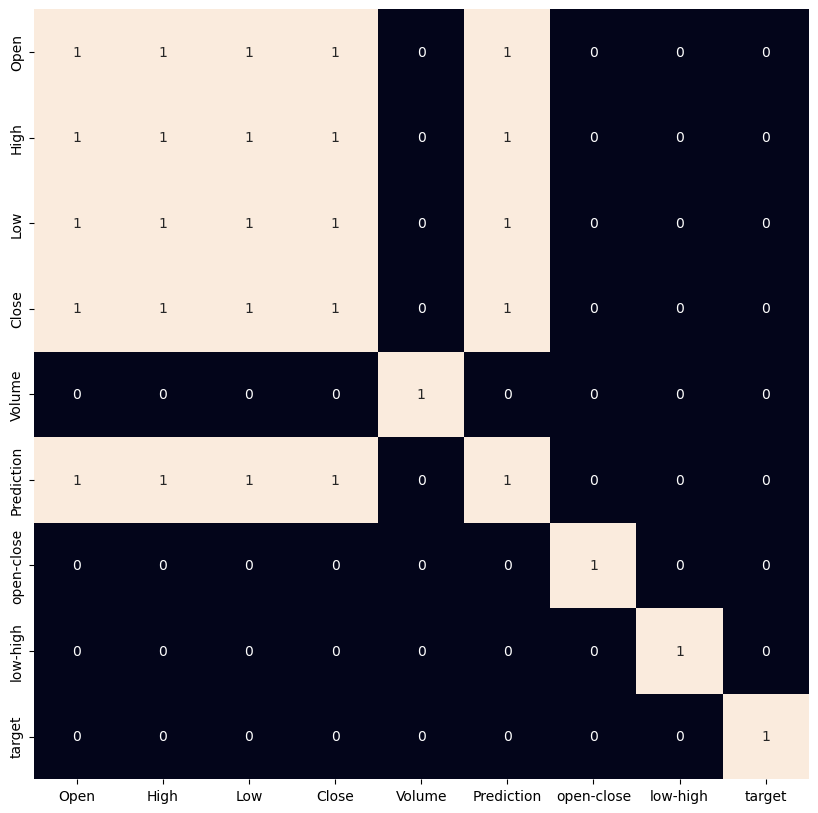

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.9, annot=True, cbar=False)
plt.show()

In [57]:
'''
from the above heatmap, we can say that there is a high correlation between open, high, close, low which is pretty obvious
and the added features are not highly correlated with each other or previously provided features which means we are good to
go and build the model
'''

'\nfrom the above heatmap, we can say that there is a high correlation between open, high, close, low which is pretty obvious\nand the added features are not highly correlated with each other or previously provided features which means we are good to\ngo and build the model\n'

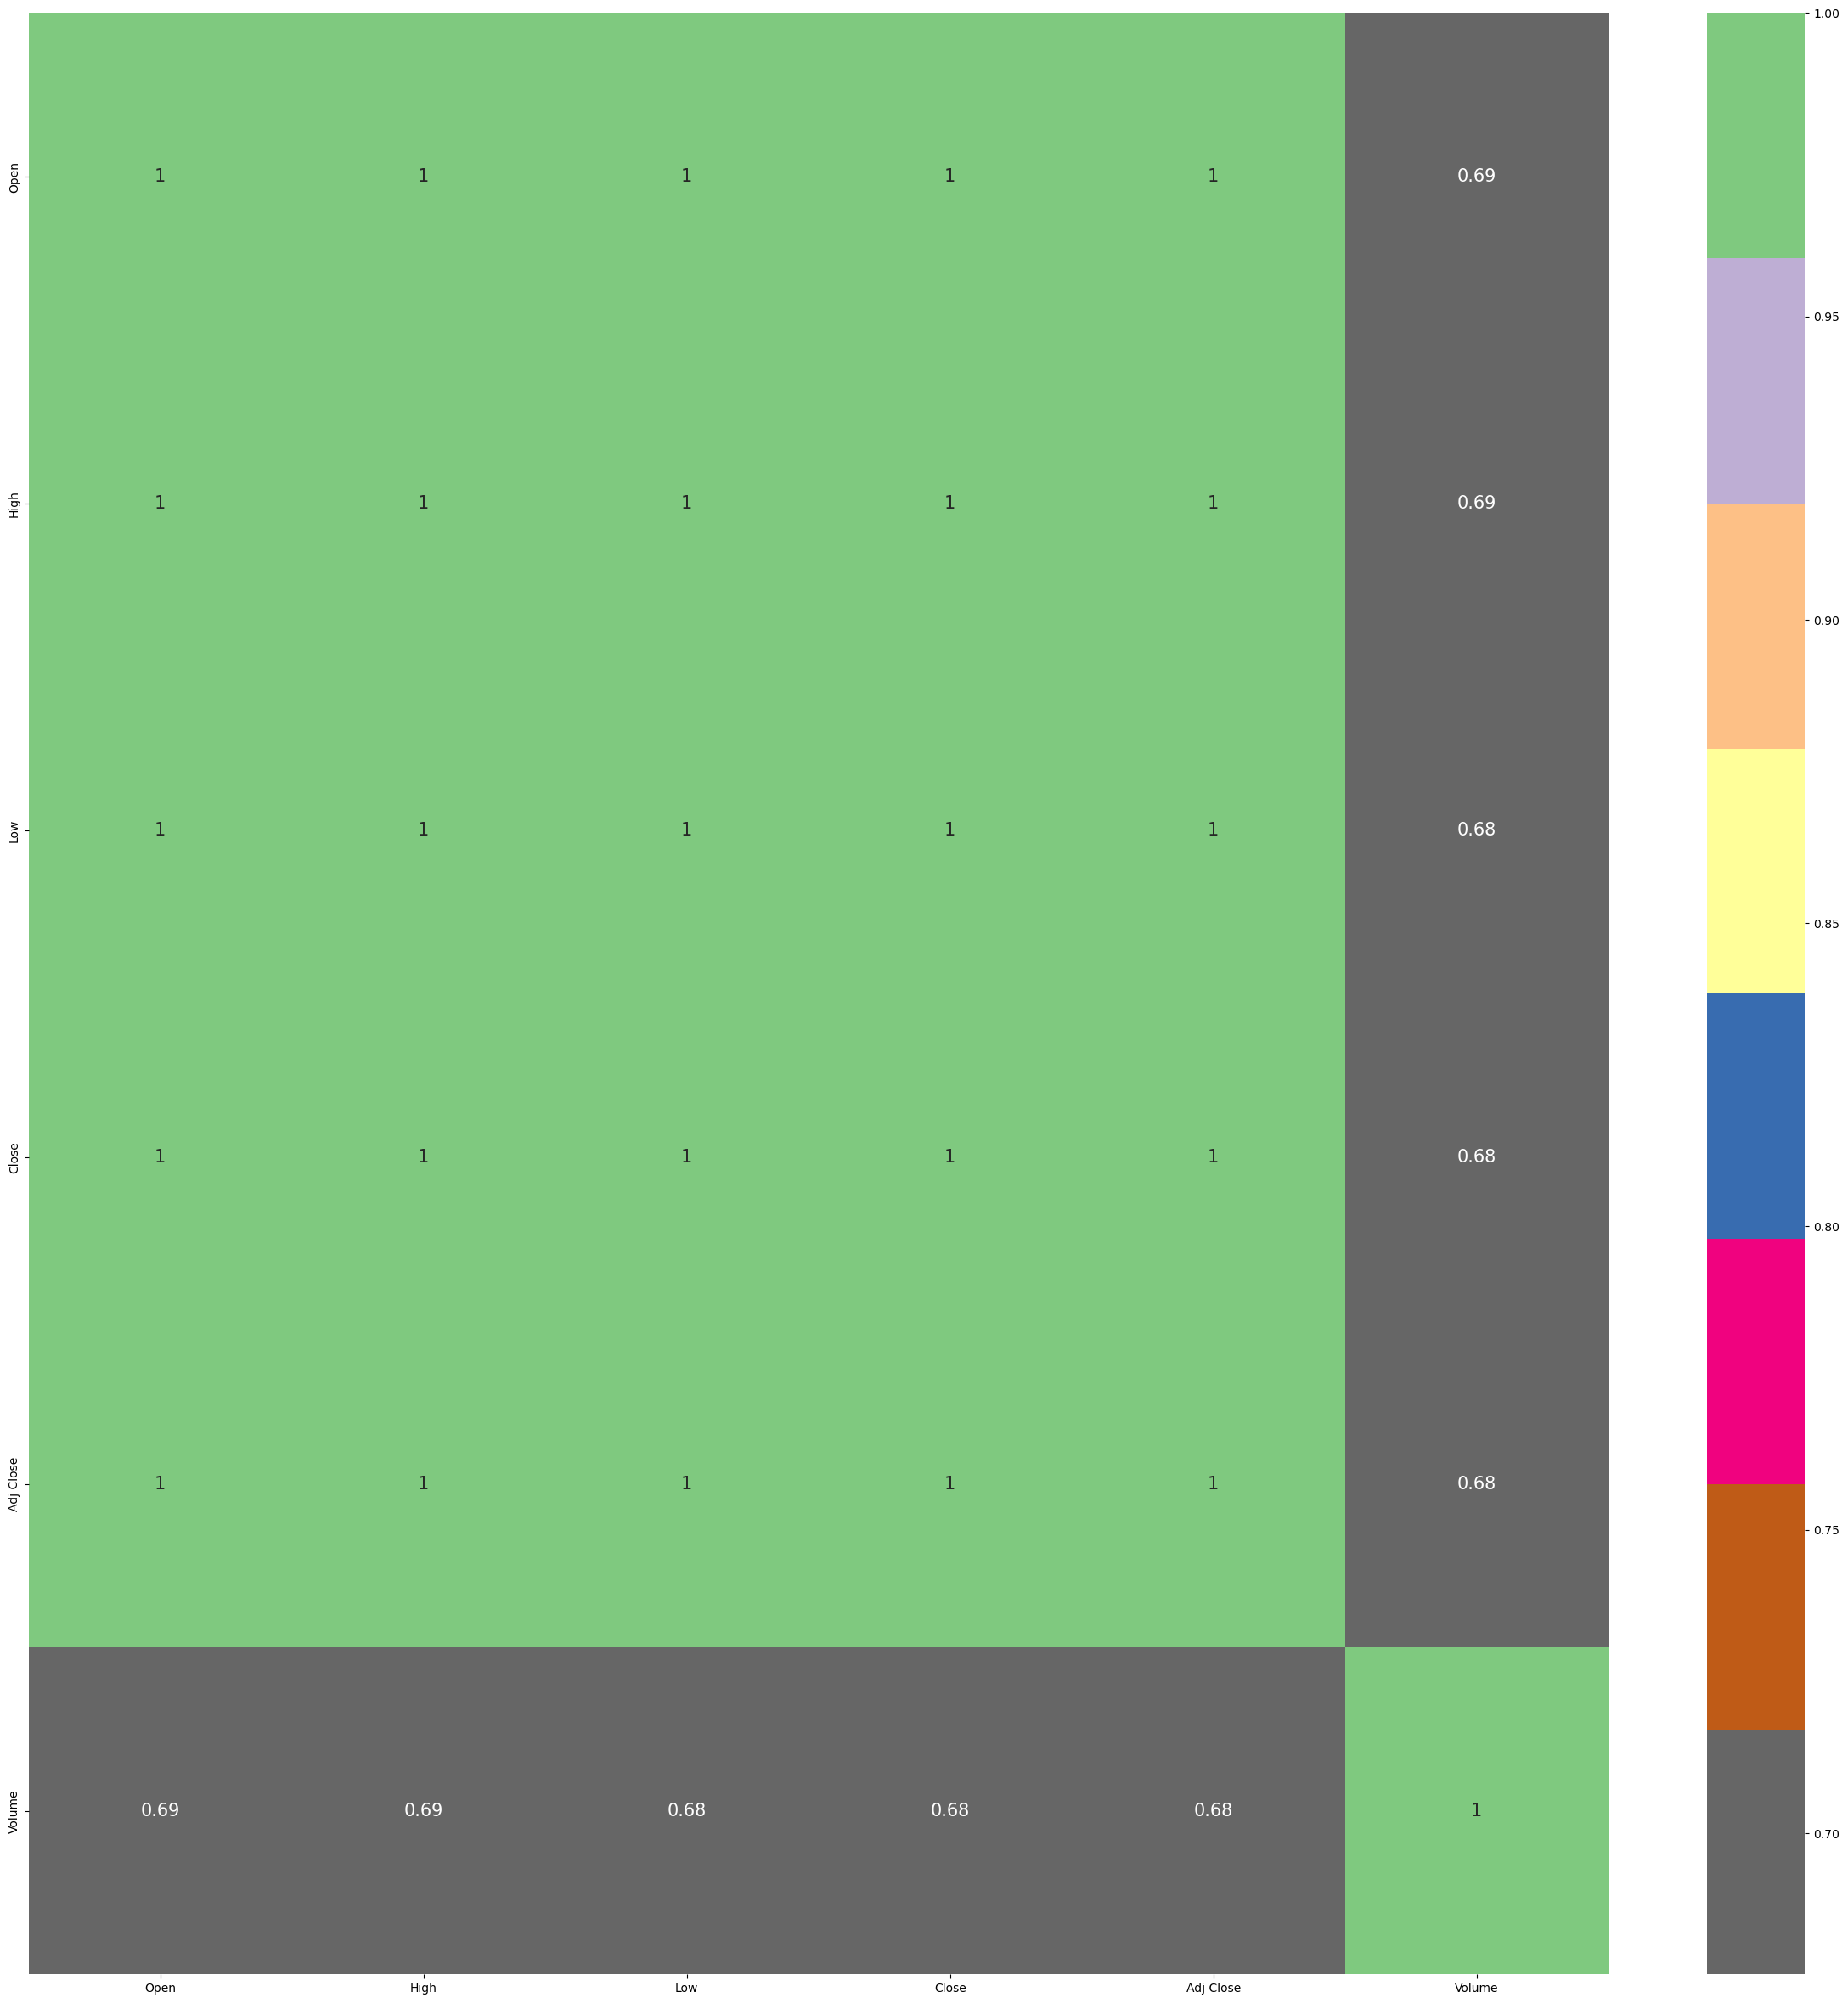

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap = plt.cm.Accent_r, annot_kws={'fontsize':15})
plt.show()

In [13]:
def correlation(data, threshold):
    corr = data.corr()['Adj Close'].sort_values(ascending=False)[1:]
    abs_corr = abs(corr)
    relevant_features = abs_corr[abs_corr>threshold]
    return relevant_features

In [16]:
corr_features = correlation(df,0.81)

In [17]:
corr_features

Adj Close    1.000000
High         0.999462
Low          0.999363
Open         0.998809
Name: Adj Close, dtype: float64

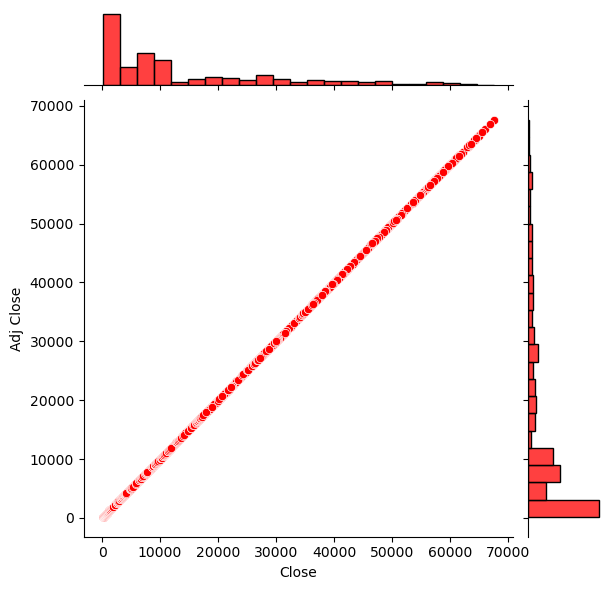

In [23]:
sns.jointplot(x = 'Close', y = 'Adj Close', data = df, color='red')

In [24]:
#btc adj close is highly correlated with close

In [25]:
df.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500


In [28]:
prediction_days = 30

df['Prediction'] = df[['Adj Close']].shift(-prediction_days)
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,383.757996
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,391.441986
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,389.545990
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,382.845001
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,386.475006
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,383.157990
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,358.416992


In [29]:
df.tail(7)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2023-11-11,37310.070312,37407.093750,36773.667969,37138.050781,37138.050781,13924272142,NaN
2023-11-12,37133.992188,37227.691406,36779.117188,37054.519531,37054.519531,11545715999,NaN
2023-11-13,37070.304688,37405.117188,36399.605469,36502.355469,36502.355469,19057712790,NaN
2023-11-14,36491.789062,36753.351562,34948.500000,35537.640625,35537.640625,23857403554,NaN
2023-11-15,35548.113281,37964.894531,35383.781250,37880.582031,37880.582031,27365821679,NaN
2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366,NaN
2023-11-17,36164.824219,36632.976562,36112.046875,36403.488281,36403.488281,25443631104,NaN


In [32]:
#create the independent dataset

#convert the dataframe to a numpy array and drop the prediction column

X = np.array(df.drop(['Prediction'],1))

#remove he last 'n' rows where 'n' is the prediction_days

X = X[:len(df)-prediction_days]
print(X)

[[4.65864014e+02 4.68174011e+02 4.52421997e+02 4.57334015e+02
  4.57334015e+02 2.10568000e+07]
 [4.56859985e+02 4.56859985e+02 4.13104004e+02 4.24440002e+02
  4.24440002e+02 3.44832000e+07]
 [4.24102997e+02 4.27834991e+02 3.84532013e+02 3.94795990e+02
  3.94795990e+02 3.79197000e+07]
 ...
 [2.71626289e+04 2.94481387e+04 2.71304727e+04 2.85194668e+04
  2.85194668e+04 2.78338765e+10]
 [2.85220977e+04 2.86187520e+04 2.81101855e+04 2.84157480e+04
  2.84157480e+04 1.48725275e+10]
 [2.84135312e+04 2.88890098e+04 2.81742520e+04 2.83283418e+04
  2.83283418e+04 1.27241286e+10]]


In [33]:
#create the dependent dataset

#convert the dataframe to numpy array

y = np.array(df['Prediction'])

#get all the values except the last 'n' rows
y = y[:-prediction_days]
print(y)

[  383.75799561   391.44198608   389.54598999 ... 37880.58203125
 36154.76953125 36403.48828125]


In [34]:
#split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
# set the prediction_days_array = last 30 rows from the original dataset

prediction_days_array = np.array(df.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[2.83324160e+04 2.88924746e+04 2.81779883e+04 2.87198066e+04
  2.87198066e+04 1.44480582e+10]
 [2.87328125e+04 3.01040859e+04 2.86016699e+04 2.96829492e+04
  2.96829492e+04 2.15361252e+10]
 [2.96833809e+04 3.02874824e+04 2.94817520e+04 2.99184121e+04
  2.99184121e+04 1.15411470e+10]
 [2.99186543e+04 3.01994336e+04 2.97203125e+04 2.99938965e+04
  2.99938965e+04 1.04465200e+10]
 [3.01406855e+04 3.43704375e+04 3.00978281e+04 3.30862344e+04
  3.30862344e+04 3.83635723e+10]
 [3.30773047e+04 3.51504336e+04 3.28807617e+04 3.39015273e+04
  3.39015273e+04 4.49349996e+10]
 [3.39160430e+04 3.51337578e+04 3.37091094e+04 3.45028203e+04
  3.45028203e+04 2.52543180e+10]
 [3.45042891e+04 3.48329102e+04 3.37623242e+04 3.41566484e+04
  3.41566484e+04 1.94271954e+10]
 [3.41565000e+04 3.42382109e+04 3.34168867e+04 3.39098008e+04
  3.39098008e+04 1.64180329e+10]
 [3.39077227e+04 3.43993906e+04 3.38748047e+04 3.40895742e+04
  3.40895742e+04 1.01603308e+10]
 [3.40893711e+04 3.47432617e+04 3.39475664e+04 3.4

In [36]:
from sklearn.svm import SVR

In [38]:
#create and train the SVR using the radial basis function

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [39]:
#test the model

svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  -0.12803571438712735


In [40]:
#print the predicted values

svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
print()
#print the actual values
print(y_test)

[8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.

In [42]:
#print the model predictions for the next 30 days

svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)
print()
#print actual price for bitcoin for last 30 days
print(df.tail(prediction_days))

[8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613
 8310.41672613 8310.41672613 8310.41672613 8310.41672613 8310.41672613]

                    Open          High           Low         Close  \
Date                                                                 
2023-10-19  28332.416016  28892.474609  28177.988281  28719.806641   
2023-10-20  28732.812500  30104.085938  28601.669922  29682.949219   
2023-10-21  29683.380859  30287.482422  29481.751953  29918.412109   
2023-10-22  29918.654297  30199.433594  29720.312500  29993.896484   
2023-10-23  30140.685547  34370.437500  30097.828125  33086.234375   
2023-10-24  33077.304688  35150.433594  32880.761719  33901.527344   
2023-10-25  